In [94]:
%load_ext autoreload
%autoreload 2

import pickle as pkl
import numpy as np
import random
import util
from typing import Union, List, Tuple, Optional

from torch_geometric.data import Dataset
#import imitation_data_loading
#from tutor_data_loading import preprocess_observation, action_identificator, Episode, EpisodeStep, EpisodeSet, StepSet
import torch
import os
import json
import random
import wandb
import training as trn
from model import GCN
from dataloader import TutorDataLoader
import collections
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [2]:
config = util.load_config()
processed_data_path = 'data/nooutage_processed_tutor_data/' #config['paths']['processed_tutor_imitation']
matrix_cache_path = config['paths']['con_matrix_cache']
feature_statistics_path = config['paths']['feature_statistics']

In [3]:
from dataloader import TutorDataLoader

# Defining model

In [29]:

device = 'cpu'

In [5]:
from model import GCN

# Training Loop

In [6]:
#todo seperate static (line capacities, 'standard' voltage) and dynamic attributes
#compare weights or/ex layers (sign?)
#feature: number of connected nodes?\

In [7]:
training_config = util.load_config()['training']

In [8]:
training_config

{'model_name': 'test_hetero_labelsmth',
 'model_tags': ['test'],
 'train_log_freq': 2000,
 'val_log_freq': 60,
 'n_epoch': 100,
 'lr': 0.003,
 'network_type': 'heterogenous',
 'N_GNN_layers': 8,
 'N_node_hidden': 32,
 'LReLu_neg_slope': 0.1,
 'batch_size': 64,
 'label_smoothing_alpha': 0.2,
 'aggr': 'add',
 'N_f_gen': 3,
 'N_f_load': 3,
 'N_f_endpoint': 6}

In [13]:
%%wandb
import matplotlib.pyplot as plt



estimated_train_size = int(0.8*25993)
label_smth_alpha = training_config['label_smoothing_alpha']


with tqdm(total=n_epoch*estimated_train_size) as pbar:
    model.zero_grad()
    step=0
    for e in range(n_epoch):
        for datapoint in train_dl:
            
            #Get information from datapoint

            

            






                

                


  0%|          | 8700/2079400 [4:37:55<1102:28:36,  1.92s/it]  
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/matthijs/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c5197ac40f48>", line 71, in <module>
    P = model(X_gen, X_load, X_or, X_ex, E, object_ptv).reshape((-1))
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1071, in _call_impl
    result = forward_call(*input, **kwargs)
  File "/home/matthijs/Projects/University/Masters_thesis/Software/GNN_PN_Operation_MSc_Thesis/model.py", line 162, in forward
    x=l(x, edge_index)
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1071, in _call_impl
    result = forward_call(*input, **kwargs)
  File "/home/matthijs/Software/anaconda3/lib/python3.8/site-packages/torch_geometric/nn/conv/hetero_conv.py", line 92, in forward
    out = conv(x=x_dict[src], edge_index=edge

TypeError: object of type 'NoneType' has no len()

In [14]:
norm_W_sb_neigh


2.266310691833496

In [15]:
model.lin_gen_1.weight

Parameter containing:
tensor([[-0.2379, -0.4808, -0.3585],
        [-0.1288,  0.4274, -0.5205],
        [ 0.4741,  0.3835, -0.3093],
        [-0.0464,  0.4933, -0.1828],
        [-0.4257,  0.4076,  0.1399],
        [-0.1824, -0.3836,  0.2479],
        [ 0.5565, -0.1509, -0.4988],
        [-0.5888,  0.3907,  0.0116],
        [ 0.1203, -0.5534, -0.3752],
        [ 0.3697,  0.4229,  0.0760],
        [-0.1694,  0.0545, -0.4772],
        [-0.3625,  0.3387,  0.3474],
        [-0.5713, -0.4578,  0.3157],
        [-0.3539,  0.3325, -0.2539],
        [-0.4976, -0.4762,  0.0238],
        [ 0.2982, -0.5198,  0.4801],
        [-0.5224, -0.4563, -0.1816],
        [-0.2758, -0.3707,  0.1586],
        [-0.0316,  0.1728,  0.5759],
        [ 0.5199,  0.0441, -0.4308],
        [ 0.2431, -0.1268,  0.4708],
        [ 0.3925,  0.2435, -0.4217],
        [ 0.5223,  0.3322,  0.4148],
        [-0.2115,  0.0356,  0.4968],
        [-0.2238, -0.5631,  0.3549],
        [-0.1094,  0.1531, -0.1201],
        [-0.4127

In [16]:
wrong_indices

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [17]:
print(abs(model.GNN_layers[6].convs['object__other_busbar__object'].lin_l.weight).sum())
print(abs(model.GNN_layers[6].convs['object__same_busbar__object'].lin_r.weight).sum())

tensor(93.0245, grad_fn=<SumBackward0>)
tensor(92.5276, grad_fn=<SumBackward0>)


In [18]:
model.GNN_layers[6].convs.values()

odict_values([SAGEConv(32, 32), SAGEConv(32, 32), SAGEConv(32, 32)])

In [19]:
diffs = []
for l in model.GNN_layers:
    print(l)
    if training_config['network_type'] == 'heterogenous':
        norm_W_self = abs(l.convs['object__same_busbar__object'].lin_r.weight).sum()
        norm_W_neigh = abs(l.convs['object__line__object'].lin_l.weight).sum() + \
                        abs(l.convs['object__same_busbar__object'].lin_l.weight).sum() + \
                        abs(l.convs['object__other_busbar__object'].lin_l.weight).sum()
        diffs.append(norm_W_self-norm_W_neigh)
    else:
        assert False, 'Not developped yet'

HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)
HeteroConv(num_relations=3)


In [20]:
diffs

[tensor(-179.3683, grad_fn=<SubBackward0>),
 tensor(-182.3290, grad_fn=<SubBackward0>),
 tensor(-185.4459, grad_fn=<SubBackward0>),
 tensor(-190.0928, grad_fn=<SubBackward0>),
 tensor(-177.2830, grad_fn=<SubBackward0>),
 tensor(-185.9814, grad_fn=<SubBackward0>),
 tensor(-189.4445, grad_fn=<SubBackward0>),
 tensor(-4.3578, grad_fn=<SubBackward0>)]

In [21]:
model.GNN_layers[6].convs['object__same_busbar__object'].forward(torch.rand((1,32),device=device),
                                                                  torch.tensor([],dtype=torch.long,device=device).reshape(2,0))

tensor([[-0.4024, -0.2298, -0.5843,  0.2113,  0.0195,  0.5122,  0.0314,  0.0034,
         -0.4375, -0.0978,  0.5433, -0.0088,  0.4483,  0.0339, -0.0458, -0.1398,
         -0.0524,  0.6143, -0.6052, -0.5855, -0.4438, -0.7107, -0.6309, -0.1906,
          0.0552,  0.2951,  0.2318, -0.6349,  0.4756, -0.2710, -0.3650,  0.7686]],
       grad_fn=<AddBackward0>)

In [22]:
model.GNN_layers[6].convs['object__same_busbar__object'].lin_l.bias

Parameter containing:
tensor([-0.1600, -0.1250,  0.1153,  0.1432,  0.2888,  0.0582, -0.0455, -0.1784,
        -0.2181,  0.1439,  0.0528,  0.1741,  0.3131,  0.3825, -0.1560,  0.0673,
        -0.0247,  0.1230,  0.0985,  0.1045, -0.1527, -0.0467, -0.0805, -0.1043,
        -0.0272,  0.1199, -0.0111, -0.0191,  0.1485, -0.1440, -0.1403,  0.1936],
       requires_grad=True)

In [23]:
training_config['network_type']

'heterogenous'

# Loading model 

In [30]:
train_config = config['training']
model = GCN(train_config['hyperparams']['LReLu_neg_slope'],
                         train_config['hyperparams']['weight_init_std'],
                         train_config['constants']['N_f_gen'],
                         train_config['constants']['N_f_load'],
                         train_config['constants']['N_f_endpoint'],
                         train_config['hyperparams']['N_GNN_layers'],
                         train_config['hyperparams']['N_node_hidden'],
                         train_config['hyperparams']['aggr'],
                         train_config['hyperparams']['network_type'])
model.load_state_dict(torch.load('models/earthy-bee-265'))
model.eval()

GCN(
  (activation_f): LeakyReLU(negative_slope=0.1, inplace=True)
  (lin_gen_1): Linear(3, 32, bias=True)
  (lin_gen_2): Linear(32, 32, bias=True)
  (lin_load_1): Linear(3, 32, bias=True)
  (lin_load_2): Linear(32, 32, bias=True)
  (lin_or_1): Linear(6, 32, bias=True)
  (lin_or_2): Linear(32, 32, bias=True)
  (lin_ex_1): Linear(6, 32, bias=True)
  (lin_ex_2): Linear(32, 32, bias=True)
  (GNN_layers): ModuleList(
    (0): HeteroConv(num_relations=3)
    (1): HeteroConv(num_relations=3)
    (2): HeteroConv(num_relations=3)
    (3): HeteroConv(num_relations=3)
    (4): HeteroConv(num_relations=3)
    (5): HeteroConv(num_relations=3)
    (6): HeteroConv(num_relations=3)
    (7): HeteroConv(num_relations=3)
  )
)

In [31]:
val_dl = TutorDataLoader(processed_data_path + '/val', 
                          matrix_cache_path, 
                          feature_statistics_path,
                          device=device,
                          network_type=train_config['hyperparams']['network_type'],
                          train=False)
        

In [228]:
jacobs_gen_mean = torch.zeros(3)
jacobs_load_mean = torch.zeros(3)
jacobs_or_mean = torch.zeros(6)
jacobs_ex_mean = torch.zeros(6)
jacobs_object_sum = torch.zeros((56,56))

Y_sum = torch.zeros(56)
for i in range(100):
    dp = next(val_dl.__iter__())

    #Extract features
    X_gen = dp['gen_features']
    X_load = dp['load_features']
    X_or = dp['or_features']
    X_ex = dp['ex_features']   

    #Extract the position topology vector, which relates the
    #objects ordered by type to their position in the topology vector
    object_ptv = dp['object_ptv']

    #Extract the edges
    E = dp['edges']

    #Pass through the model
    P = model(X_gen, X_load, X_or, X_ex, E, object_ptv).reshape((-1))

    #Extract the label, apply label smoothing
    Y = dp['change_topo_vect']
    label_smth_alpha = train_config['hyperparams'] \
                                        ['label_smoothing_alpha']
    Y_smth =(1-label_smth_alpha)*dp['change_topo_vect'] + \
              label_smth_alpha*0.5*torch.ones_like(Y,device=device)
    Y_sum += Y
    
    #Compute the weights for the loss
    non_sub_label_weight = train_config['hyperparams'] \
                                        ['non_sub_label_weight']
    Y_sub_mask, Y_sub_idx = trn.get_Y_subchanged(Y,dp['sub_info'])
    weights = trn.label_weights(1-Y_sub_mask,non_sub_label_weight)
    
    
    
    #Compute the loss, update gradients
    l = trn.BCELoss_labels_weighted(P,Y_smth,weights)
    l.backward()
    
    #Obtain the jacobian
    jacob = torch.autograd.functional.jacobian(func:= lambda xg, xl, xo, xe: \
                                   model(xg,xl,xo,xe,E,object_ptv),
                                   inputs=(X_gen, X_load, X_or, X_ex))
    
    #Aggregate the jacobian to determine the importance of each feature
    jacobs_gen_mean += torch.mean(torch.abs(out[0]),axis=(0,1,2))
    jacobs_load_mean += torch.mean(torch.abs(out[1]),axis=(0,1,2))
    jacobs_or_mean += torch.mean(torch.abs(out[2]),axis=(0,1,2))
    jacobs_ex_mean += torch.mean(torch.abs(out[3]),axis=(0,1,2))
    #jacobs_or_sum = torch.zeros(6)
    #jacobs_ex_sum = torch.zeros(6)
    
    #Aggregate the jacobian to determine the importance of each object's features to each objects output
    jacob_objects = torch.cat([torch.sum(torch.abs(out[0]),axis=(1,3)),
        torch.sum(torch.abs(out[1]),axis=(1,3)),
        torch.sum(torch.abs(out[2]),axis=(1,3)),
        torch.sum(torch.abs(out[3]),axis=(1,3))],axis=1)[:,object_ptv]
    jacobs_object_sum += jacob_objects

<BarContainer object of 6 artists>

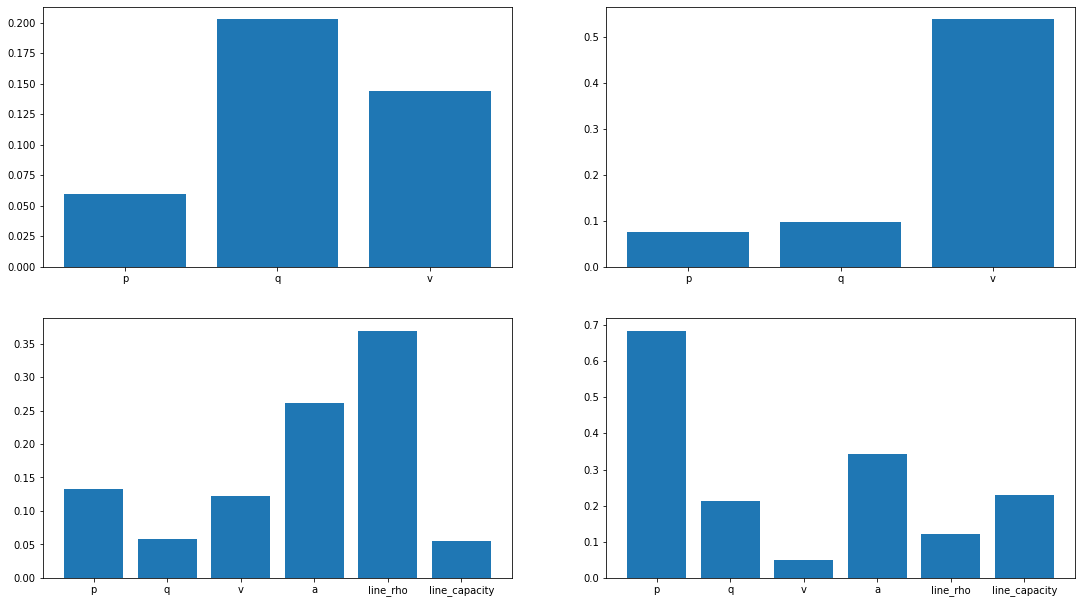

In [229]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
axs[0,0].bar(['p','q','v'],jacobs_gen_mean)
axs[0,1].bar(['p','q','v'],jacobs_load_mean)
axs[1,0].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],jacobs_or_mean)
axs[1,1].bar(['p', 'q', 'v', 'a', 'line_rho','line_capacity'],jacobs_ex_mean)
#axs[0,0].bar(['p','q','v'],jacobs_gen_mean)

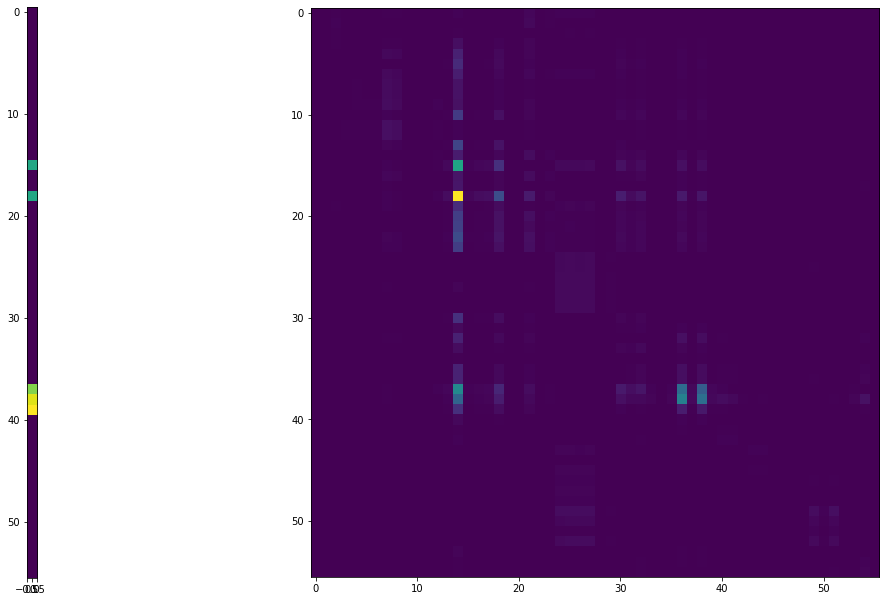

In [233]:
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1,2, height_ratios=[1,1], width_ratios=[1])
# print(gs)
# f = plt.figure()
# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [0.65, 1]})
fig.set_size_inches(18.5, 10.5)
#f.subplots_adjust(hspace=0)
axs[0].imshow(torch.log(Y_sum.reshape(-1,1)+0.1))
axs[1].imshow(jacobs_sum)

In [240]:
torch.argmax(jacobs_sum.sum(axis=0))

tensor(14)

# Old

#### Testing whether the ordering checks out

In [24]:
ds = TutorDataset(processed_data_path, matrix_cache_path, feature_statistics_path)
dp = next(iter(ds))

NameError: name 'TutorDataset' is not defined

In [ ]:
gen_ptv = dp['gen_pos_topo_vect']
load_ptv = dp['load_pos_topo_vect']
or_ptv = dp['line_or_pos_topo_vect']
ex_ptv = dp['line_ex_pos_topo_vect']
object_indices = np.argsort(np.concatenate([gen_ptv,load_ptv,or_ptv,ex_ptv]))

In [ ]:
gen_ptv

In [ ]:
object_indices

In [ ]:
gen_dummy = len(gen_ptv)*[0]
gen_dummy[-1] = 1000
load_dummy = len(load_ptv)*[1]
or_dummy = len(or_ptv)*[2]
ex_dummy = len(ex_ptv)*[3]
dummies = np.array(gen_dummy + load_dummy + or_dummy + ex_dummy)
dummies[object_indices]

In [ ]:
dummies_tensor = torch.cat([torch.tensor(d) for d in [gen_dummy,load_dummy,or_dummy,ex_dummy]])
dummies_tensor[object_indices]